# Data science Jobs analysys 

___

In [1]:
import pandas as pd 

In [14]:
import seaborn as sns

In [19]:
import matplotlib.pyplot as plt

In [2]:
dsj = pd.read_csv("DS_SALARIES.csv")

**How many jobs does the datasrt has**

In [3]:
dsj.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
dsj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


**From wich year we have more information?**


In [43]:
dsj_year = dsj.groupby("work_year")
dsj_yc = dsj_year.count()
dsj_yc.reset_index(inplace=True)
dsj_yc

,work_year,Unnamed: 0,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,72,72,72,72,72,72,72,72,72,72,72
1,2021,217,217,217,217,217,217,217,217,217,217,217
2,2022,318,318,318,318,318,318,318,318,318,318,318


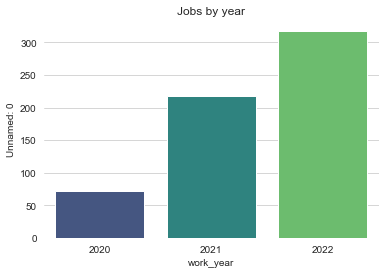

In [101]:
plt = sns.barplot(x="work_year", y="Unnamed: 0",data=dsj_yc, palette="viridis").set_title("Jobs by year")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

**For wich expereicnce level we have more job offers?**

In [47]:
dsj_ex = dsj.groupby("experience_level")
dsj_ec = dsj_ex.count()
dsj_ec.reset_index(inplace=True)
dsj_ec

,experience_level,Unnamed: 0,work_year,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,EN,88,88,88,88,88,88,88,88,88,88,88
1,EX,26,26,26,26,26,26,26,26,26,26,26
2,MI,213,213,213,213,213,213,213,213,213,213,213
3,SE,280,280,280,280,280,280,280,280,280,280,280


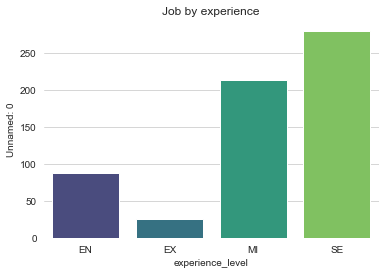

In [99]:
sns.barplot(x="experience_level", y="Unnamed: 0", data=dsj_ec, palette="viridis").set_title("Job by experience")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

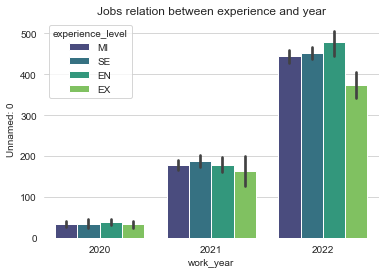

In [98]:
sns.barplot(x="work_year", y="Unnamed: 0", hue="experience_level", data=dsj, palette="viridis").set_title("Jobs relation between experience and year")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 26.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


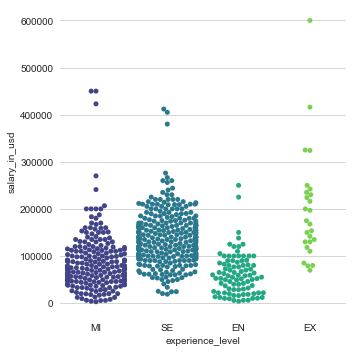

In [114]:
sns.catplot(x="experience_level", y="salary_in_usd", hue="experience_level", kind="swarm", data=dsj, palette="viridis")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

**Salary average**

In [124]:
dsj_ec_av = dsj_ex.mean()
dsj_ec_av.drop(["Unnamed: 0", "work_year", "remote_ratio"], axis = 1, inplace=True)
dsj_ec_av


,salary,salary_in_usd
experience_level,,
EN,264622.454545,61643.318182
EX,427072.115385,199392.038462
MI,480617.690141,87996.056338
SE,213949.353571,138617.292857


**Wich company size has more job offers**


In [125]:
dsj_size = dsj.groupby("company_size")
dsj_size.count()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location
company_size,,,,,,,,,,,
L,198,198,198,198,198,198,198,198,198,198,198
M,326,326,326,326,326,326,326,326,326,326,326
S,83,83,83,83,83,83,83,83,83,83,83


**Hue between experience level and company size**


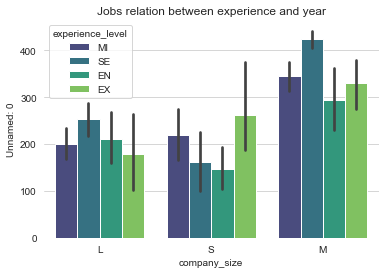

In [110]:
sns.barplot(x="company_size", y="Unnamed: 0", hue="experience_level", data=dsj, palette="viridis").set_title("Jobs relation between experience and year")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

**Employment type analysis**


In [8]:
dsj["job_title"].nunique()

50

**The three most popular salary currencies**

In [133]:
dsj["salary_currency"].head()

0    EUR
1    USD
2    GBP
3    USD
4    USD
Name: salary_currency, dtype: object

**Wich Job has de highest salary?**


In [9]:
dsj["salary_in_usd"].max()

600000

In [10]:
dsj[dsj["salary_in_usd"] == 600000]


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
252,252,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L


**Wich Job has de lowest salary?**

In [11]:
dsj["salary_in_usd"].min()

2859

In [12]:
dsj[dsj["salary_in_usd"] == 2859]

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
176,176,2021,MI,FT,Data Scientist,58000,MXN,2859,MX,0,MX,S
